In [6]:
!pip3 install tqdm

In [8]:
!pip3 install scipy

  Using cached https://files.pythonhosted.org/packages/04/66/ec5f1283d6a290a9153881a896837487338c44639c1305cc59e1c7b69cc9/scipy-1.3.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
    100% |████████████████████████████████| 13.9MB 2.2MB/s eta 0:00:01


In [9]:
import numpy as np
import pandas as pd
from pprint import pprint
import math
from scipy import log,exp,sqrt,stats
from tqdm import tqdm

In [10]:
data = pd.read_csv("resources/dataset_train.csv")
#data_test = pd.read_csv("resources/dataset_test.csv")

In [11]:
data.head(10)

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.0,628.046051,-4.861976,-6.280461,NaN,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.0,411.412727,5.931832,-4.114127,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-0.171704,-244.03492,72.25
8,8,Gryffindor,Bella,Leatherman,1998-12-07,Left,20278.0,496.394945,-5.215891,-4.963949,5.855,-626.552041,567.842402,-6.198661,925.255500,1.086518,1.147032,-252.27561,244.11
9,9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,46316.0,527.193585,7.922205,-5.271936,3.356,-398.101991,341.475606,4.978614,1041.414665,2.068824,-0.529579,-244.57527,-0.09


In [12]:
data.mean()

Index                              799.500000
Arithmancy                       49634.570243
Astronomy                           39.797131
Herbology                            1.141020
Defense Against the Dark Arts       -0.387863
Divination                           3.153910
Muggle Studies                    -224.589915
Ancient Runes                      495.747970
History of Magic                     2.963095
Transfiguration                   1030.096946
Potions                              5.950373
Care of Magical Creatures           -0.053427
Charms                            -243.374409
Flying                              21.958012
dtype: float64

In [13]:
data_clean = data.fillna(data.mean())
data_clean

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.000000,-487.886086,5.727180,4.878861,4.72200,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.000000,-552.060507,-5.987446,5.520605,-5.61200,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.000000,-366.076117,7.725017,3.660761,6.14000,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.000000,697.742809,-6.497214,-6.977428,4.02600,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.000000,436.775204,-7.820623,-0.387863,2.23600,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.000000,-613.687160,-4.289197,6.136872,-6.59200,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.000000,628.046051,-4.861976,-6.280461,3.15391,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.000000,411.412727,5.931832,-4.114127,2.76900,-502.021336,439.351416,2.963095,1041.091935,6.581791,-0.171704,-244.03492,72.25
8,8,Gryffindor,Bella,Leatherman,1998-12-07,Left,20278.000000,496.394945,-5.215891,-4.963949,5.85500,-626.552041,567.842402,-6.198661,925.255500,1.086518,1.147032,-252.27561,244.11
9,9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,46316.000000,527.193585,7.922205,-5.271936,3.35600,-398.101991,341.475606,4.978614,1041.414665,2.068824,-0.529579,-244.57527,-0.09


### Liste des variables

In [14]:
column_names_list = list(data_clean.columns)
column_names_list

['Index',
 'Hogwarts House',
 'First Name',
 'Last Name',
 'Birthday',
 'Best Hand',
 'Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

### Definir m

In [15]:
m = data_clean['Index'].shape[0]
m
type(m)

int

### Normalize

#### with pandas

In [16]:
df = data_clean[column_names_list[6:19]]
data_norm = (df - df.mean()) / (df.max() - df.min())
data_norm

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,6.765407e-02,-0.266110,0.209332,2.656001e-01,0.083591,0.227927,7.959727e-02,0.109306,0.050389,-1.184586e-01,1.207754e-01,0.297028,-0.106067
1,1.361244e-01,-0.298473,-0.325374,2.979632e-01,-0.467291,-0.120589,-2.773137e-01,0.055140,0.149990,7.120497e-02,2.277807e-02,-0.247323,-0.294020
2,-2.005209e-01,-0.204681,0.300522,2.041715e-01,0.159182,0.408229,2.314868e-01,0.028555,0.301519,1.523594e-01,-7.250921e-02,0.450068,0.018374
3,-1.312000e-01,0.331801,-0.348642,-3.323108e-01,0.046489,-0.143381,6.117559e-02,-0.374613,-0.570400,-2.812544e-01,6.182943e-03,-0.378216,0.387984
4,8.137134e-02,0.200195,-0.409048,2.799419e-18,-0.048932,-0.100819,2.244216e-01,-0.308813,-0.481785,-8.990266e-02,-3.306682e-02,-0.365317,0.295353
5,-2.197978e-01,-0.329551,-0.247858,3.290414e-01,-0.519532,-0.099320,-2.156889e-01,0.116498,0.118276,3.181288e-01,1.731998e-01,-0.128326,-0.123003
6,-3.615439e-03,0.296653,-0.274002,-2.971628e-01,0.000000,-0.322322,1.906596e-01,-0.495722,-0.554032,-2.360233e-01,3.240844e-02,-0.405945,0.520241
7,-1.285478e-01,0.187405,0.218673,-1.879149e-01,-0.020519,-0.127327,-1.221957e-01,0.000000,0.057167,3.462816e-02,-1.856722e-02,-0.018543,0.109202
8,-2.269967e-01,0.230262,-0.290157,-2.307713e-01,0.143989,-0.184481,1.562086e-01,-0.441558,-0.545110,-2.667429e-01,1.884485e-01,-0.249888,0.482373
9,-2.566050e-02,0.245793,0.309522,-2.463030e-01,0.010773,-0.079633,-3.342654e-01,0.097140,0.058845,-2.128714e-01,-7.474644e-02,-0.033712,-0.047874


#### with python

In [17]:
#pour un feature
def centrer_reduire_feature (X):
    stdev = statistics.stdev(X)
    mean = statistics.mean(X)
    A = []
    for x in X :
        a = float((x - mean)/stdev)
        A.append(a)
    return np.array(A), stdev, mean

In [18]:
# pour plusieures features a la fois
def centrer_reduire_matrix(XXX):
    mean = XXX.mean(axis=0)
    stdev = XXX.std(axis=0)
    XXX = (XXX - mean)/stdev
    return XXX, mean, stdev

### Definir X 

In [19]:
# Add a column of ones in X
X0 = np.ones(m)
X0[:10]
X0.shape


(1600,)

In [20]:
X1 = list(data_clean['Best Hand'])
set(X1)

{'Left', 'Right'}

In [21]:

X1 = [0.0 if el == 'Left' else 1.0 for el in X1 ]
X1 = np.array(X1)
X1[:10]
set(X1)

{0.0, 1.0}

In [22]:
#X2_15 = data_clean[column_names_list[6:19]]
X2_15 = data_norm
X2_15[:10]

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.067654,-0.266110,0.209332,2.656001e-01,0.083591,0.227927,0.079597,0.109306,0.050389,-0.118459,0.120775,0.297028,-0.106067
1,0.136124,-0.298473,-0.325374,2.979632e-01,-0.467291,-0.120589,-0.277314,0.055140,0.149990,0.071205,0.022778,-0.247323,-0.294020
2,-0.200521,-0.204681,0.300522,2.041715e-01,0.159182,0.408229,0.231487,0.028555,0.301519,0.152359,-0.072509,0.450068,0.018374
3,-0.131200,0.331801,-0.348642,-3.323108e-01,0.046489,-0.143381,0.061176,-0.374613,-0.570400,-0.281254,0.006183,-0.378216,0.387984
4,0.081371,0.200195,-0.409048,2.799419e-18,-0.048932,-0.100819,0.224422,-0.308813,-0.481785,-0.089903,-0.033067,-0.365317,0.295353
5,-0.219798,-0.329551,-0.247858,3.290414e-01,-0.519532,-0.099320,-0.215689,0.116498,0.118276,0.318129,0.173200,-0.128326,-0.123003
6,-0.003615,0.296653,-0.274002,-2.971628e-01,0.000000,-0.322322,0.190660,-0.495722,-0.554032,-0.236023,0.032408,-0.405945,0.520241
7,-0.128548,0.187405,0.218673,-1.879149e-01,-0.020519,-0.127327,-0.122196,0.000000,0.057167,0.034628,-0.018567,-0.018543,0.109202
8,-0.226997,0.230262,-0.290157,-2.307713e-01,0.143989,-0.184481,0.156209,-0.441558,-0.545110,-0.266743,0.188448,-0.249888,0.482373
9,-0.025661,0.245793,0.309522,-2.463030e-01,0.010773,-0.079633,-0.334265,0.097140,0.058845,-0.212871,-0.074746,-0.033712,-0.047874


In [23]:
#X2_15 = np.array(data_clean[column_names_list[6:19]])
X2_15 = np.array(data_norm)
X2_15[:10]


array([[ 6.76540661e-02, -2.66109864e-01,  2.09331933e-01,
         2.65600129e-01,  8.35913602e-02,  2.27926506e-01,
         7.95972652e-02,  1.09306272e-01,  5.03888627e-02,
        -1.18458638e-01,  1.20775433e-01,  2.97027718e-01,
        -1.06066818e-01],
       [ 1.36124443e-01, -2.98472930e-01, -3.25373553e-01,
         2.97963194e-01, -4.67290883e-01, -1.20589471e-01,
        -2.77313732e-01,  5.51396162e-02,  1.49989672e-01,
         7.12049728e-02,  2.27780651e-02, -2.47323079e-01,
        -2.94020091e-01],
       [-2.00520933e-01, -2.04681277e-01,  3.00521702e-01,
         2.04171542e-01,  1.59181744e-01,  4.08228637e-01,
         2.31486790e-01,  2.85552452e-02,  3.01518931e-01,
         1.52359354e-01, -7.25092066e-02,  4.50067601e-01,
         1.83740555e-02],
       [-1.31199993e-01,  3.31801030e-01, -3.48641569e-01,
        -3.32310766e-01,  4.64891693e-02, -1.43381202e-01,
         6.11755909e-02, -3.74612822e-01, -5.70399806e-01,
        -2.81254433e-01,  6.18294344e

In [24]:
set(X2_15[:,1])

{0.21096314621997436,
 0.3275716465310552,
 -0.28133702849191167,
 -0.32676430806676393,
 0.22909604142294526,
 0.3106404052265219,
 -0.3033631983564078,
 0.2622405323629202,
 -0.28117718813598813,
 0.3180864944299451,
 -0.26829495483930993,
 0.2371126037762963,
 -0.24083253188917195,
 2.866605189045756e-17,
 0.1677885491125082,
 -0.24774039359243044,
 0.32929286513586226,
 -0.2893996183307443,
 0.3027849180659495,
 -0.35173794197007163,
 -0.2361368025973966,
 -0.306901249998841,
 -0.27728674647698165,
 0.08044256330868654,
 -0.24887677461084573,
 -0.3148681784328921,
 -0.4184789642618494,
 0.3273476608528583,
 -0.26525507845551544,
 -0.26478035670078587,
 0.1096822907705431,
 -0.2352643674931655,
 0.19807018630579173,
 -0.13091336515615373,
 0.11969475173489039,
 -0.191929099998866,
 -0.17882054442183906,
 0.13499308800940577,
 0.18082425972911773,
 0.027119666744937466,
 0.14444349572119075,
 0.3352031631138567,
 0.3125322669974474,
 0.26549655747438916,
 -0.19177174558708632,
 -0.31

In [25]:
X = np.c_[X0, X1, X2_15]
X[:3]

array([[ 1.        ,  0.        ,  0.06765407, -0.26610986,  0.20933193,
         0.26560013,  0.08359136,  0.22792651,  0.07959727,  0.10930627,
         0.05038886, -0.11845864,  0.12077543,  0.29702772, -0.10606682],
       [ 1.        ,  1.        ,  0.13612444, -0.29847293, -0.32537355,
         0.29796319, -0.46729088, -0.12058947, -0.27731373,  0.05513962,
         0.14998967,  0.07120497,  0.02277807, -0.24732308, -0.29402009],
       [ 1.        ,  0.        , -0.20052093, -0.20468128,  0.3005217 ,
         0.20417154,  0.15918174,  0.40822864,  0.23148679,  0.02855525,
         0.30151893,  0.15235935, -0.07250921,  0.4500676 ,  0.01837406]])

In [26]:
X.shape[0]

1600

In [27]:
# premiere colonne de X (X0)
X[:,0]
# deuxieme colonne de X (hands right=0 left=1)
X[:,1]
# troisieme colonne de X (Arithmacy)
X[:,2]

array([ 0.06765407,  0.13612444, -0.20052093, ...,  0.11034463,
        0.25577556, -0.00769814])

### Definir Y

In [28]:
y_raw = list(data['Hogwarts House'])
s = set(y_raw)
s

{'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'}

In [29]:
y = np.array([ord(a[0]) for a in y_raw])
y[:10]

array([82, 83, 82, 71, 71, 83, 71, 72, 71, 72])

In [30]:
y_Gry = np.array([1.0 if el == 'Gryffindor' else 0.0 for el in y_raw ])
y_Huf = np.array([1.0 if el == 'Hufflepuff' else 0.0 for el in y_raw ])
y_Rav = np.array([1.0 if el == 'Ravenclaw' else 0.0 for el in y_raw ])
y_Sly = np.array([1.0 if el == 'Slytherin' else 0.0 for el in y_raw ])

In [31]:
y_Gry.shape, y_Huf.shape, y_Rav.shape, y_Sly.shape

((1600,), (1600,), (1600,), (1600,))

In [32]:
y_Gry[0:10], y_Huf[0:10], y_Rav[0:10], y_Sly[0:10]

(array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [34]:
Y = []
for name in s :  
    Y.append([1.0 if el == name else 0.0 for el in y_raw ])
Y = np.array(Y)
Y

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

Y = Y.T
Y

In [98]:
Y.shape
Y[0]

array([0., 0., 0., ..., 0., 1., 1.])

### Definir Theta


In [36]:
theta = np.zeros(15)
#theta = np.array([0.1,0.1,0.1,0.1,0.1,0.2,0.3,0.1,0.1,0.2,0.3,0.1,0.1,0.2,0.1])

In [37]:
X.shape, Y.shape, theta.shape

((1600, 15), (1600, 4), (15,))

In [40]:
X.shape[0]

1600

In [46]:
l =[]
for i in range (0, Y.shape[0]):
  l.append(sum(Y[0]))
set(l)

{1.0}

In [47]:
type(X), type(y), type(theta)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

### Model lineaire :  Hypothese y=ax+b

In [48]:
def hipothesis_linear(X, theta):
    #return theta[0] + theta[1] * X
    return np.dot(X, theta)

In [49]:
# test hipothesis
h = hipothesis_linear(X[:,0:2], theta[0:2])
h.shape
set(h)
h[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Model logistic :  Hypothese sigmoidale

In [50]:
def sigmoid(z):
    # VERSION NUMPY
    #return 1/(1 + np.exp(-z))
    # VERSION SCIPY
    return 1/(1 + exp(-z))

In [51]:
# test sigmoid
sigmoid(-10)

4.5397868702434395e-05

In [52]:
def hipothesis_log(X, theta):  
    return (sigmoid(np.dot(X, theta)))
    # returns a 100 x 1 matrix

In [53]:
# test hipothesis
h = hipothesis_log(X[:,0:15], theta[0:15])
h.shape

(1600,)

### Tester la fonction du cout logistique

In [54]:
def cost_linear(X, y, theta):
    m = X.shape[0]
    print("m=", m)
    loss = hipothesis_linear(X, theta) - y
    print("loss=", loss)
    print('loss shape=', loss.shape)
    print("loss values=", set(loss))
    #mean_loss = np.sum((loss ** 2) ** 0.5)/ m
    #print("mean_loss=", mean_loss)
    loss2 = loss ** 2
    print("loss2=", loss2)
    print('loss shape=', loss2.shape)
    c = np.sum(loss2)
    print("c=" , c)
    cost = (np.sum(loss ** 2)) / (2 * m) 
    print("cost", cost)
    return cost

In [55]:
cost_linear(X[:,0:15], y_Gry, theta[0:15])

m= 1600
loss= [ 0.  0.  0. ... -1.  0.  0.]
loss shape= (1600,)
loss values= {0.0, -1.0}
loss2= [0. 0. 0. ... 1. 0. 0.]
loss shape= (1600,)
c= 327.0
cost 0.1021875


0.1021875

In [56]:
# cost 2018
def cost_log_2018(X, y, theta):
    m = X.shape[0]
    hip = hipothesis_log(X, theta)
    hip[hip == 1] = 0.999 
    #print("hip=", hip)
    c1 = np.dot(y.T, np.log(hip))
    print("cost Y=", c1)
    c2 = np.dot((1-y).T, np.log(1-hip))
    print("cost 1-Y=", c2)
    cost = (-1/m) *  (c1 + c2)
    return cost

In [57]:
cost_log_2018(X[:,0:15], y_Gry, theta[0:15])

cost Y= -226.6591280431021
cost 1-Y= -882.3763608528106


0.6931471805599455

In [58]:
# cost 2019
def cost_log_2019(X, y, theta):
    m = X.shape[0]
    hip = hipothesis_log(X, theta)
    #print("hip=", hip)
    hip[hip == 1] = 0.999 
    #print("hip=", hip)
    loss = y * np.log(hip) + (1-y) * np.log(1-hip)
    #print("loss=", loss)
    cost =  (-1/m) * (np.sum(loss)) 
    return cost


In [59]:
cost_log_2019(X[:,0:15], y_Gry, theta[0:15])

0.6931471805599452

In [60]:
def predict(X, theta):
      return(sigmoid(np.dot(X, theta)))

In [61]:
def cost(X, y, theta):
    return((-1 / X.shape[0]) * np.sum(y * np.log(predict(X, theta)) + (1 - y) * np.log(1 - predict(X, theta))))

In [62]:
cost(X[:,0:15], y_Gry, theta[0:15])

0.6931471805599452

### Training

In [63]:

def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variables utiles
    m = X.shape[0]
    J_history = []
    for _ in tqdm(range(num_iters)):
    #for _ in range(num_iters):
        #loss = hipothesis_log(X, theta) - y
        #gradient = (alpha / m) * (np.dot(loss, X))
        #theta = theta - gradient
        theta = theta - (alpha/m) * np.dot((predict(X, theta) - y), X)
        cost = cost_log_2019(X, y, theta)
        J_history.append(cost)
        #J_history.append(cost(X, y, theta))
    return theta, J_history

In [68]:
import matplotlib.pyplot as plt

def visualize_cost(J_history) :
    %matplotlib inline
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(J_history)


In [64]:
theta = np.zeros(15)
theta_Gry, J_history = fit(X, y_Gry, theta, 0.05547, 200000)

100%|██████████| 200000/200000 [01:05<00:00, 3039.31it/s]


In [65]:
theta_Gry

array([-3.9722245 ,  0.6466751 , -4.38681363,  1.08499541, -6.33317829,
       -0.94957602,  4.8350571 ,  0.09037308,  4.57397408, -2.65027486,
       -3.73571991, -0.94770564,  0.55564161, -0.72931256,  4.76197122])

In [66]:
J_history[-1]

0.04276325240001377

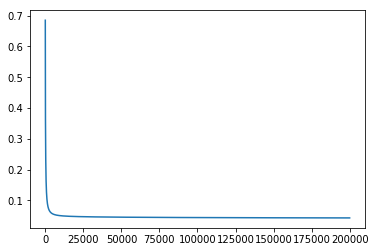

In [69]:
visualize_cost(J_history)

100%|██████████| 200000/200000 [00:56<00:00, 3523.80it/s]


[-2.43380345  0.12385705  2.00508575  5.12481853  7.13518874 -5.86562983
  1.99679449 -4.89929829 -6.45421237  3.48320727  1.99878244 -1.27843303
 -0.23649972  0.06063479 -2.7376722 ]
0.058126198584821306


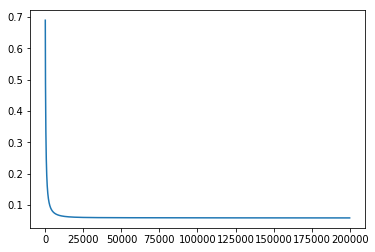

In [83]:
theta = np.zeros(15)
theta_Huf, J_history = fit(X, y_Huf, theta, 0.05547, 200000)
print(theta_Huf)
print(J_history[-1])
visualize_cost(J_history)

100%|██████████| 200000/200000 [00:59<00:00, 3351.23it/s]


[-2.52263809 -0.20594758  1.75358726 -3.42685654  3.43223144  3.3144334
  1.19111064  4.238581    4.62289409  0.28998038 -0.77526696 -0.1024706
  0.4070898   4.83535708  0.74307937]
0.06808399593142939


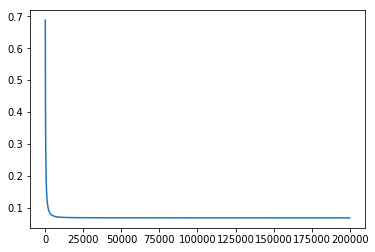

In [84]:
theta = np.zeros(15)
theta_Rav, J_history = fit(X, y_Rav, theta, 0.05547, 200000)
print(theta_Rav)
print(J_history[-1])
visualize_cost(J_history)

100%|██████████| 200000/200000 [01:01<00:00, 3255.60it/s]


[-3.66138804 -0.35445388  0.15595263 -3.46998332 -2.94613117  3.87244453
 -6.90906571 -1.59053254 -3.17071882 -0.23835901  3.85240142  2.99487082
 -0.94066588 -3.66170159 -2.50883135]
0.046937139224012187


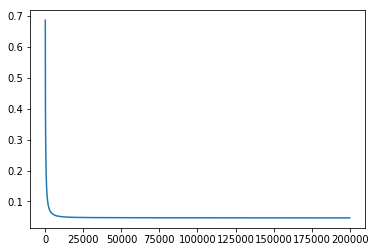

In [85]:
theta = np.zeros(15)
theta_Sly, J_history = fit(X, y_Sly, theta, 0.05547, 200000)
print(theta_Sly)
print(J_history[-1])
visualize_cost(J_history)

### Predict

#### Calcul probabilite

In [86]:
probability_Gry = sigmoid(np.dot(X, theta_Gry))
print(probability_Gry.shape)
#print(set(probability_Gry))

(1600,)


In [87]:
probability_Huf = sigmoid(np.dot(X, theta_Huf))
print(probability_Huf.shape)
#print(set(probability_Huf))

(1600,)


In [88]:
probability_Rav = sigmoid(np.dot(X, theta_Rav))
print(probability_Rav.shape)
#print(set(probability_Rav))

(1600,)


In [89]:
probability_Sly = sigmoid(np.dot(X, theta_Sly))
print(probability_Sly.shape)
#print(set(probability_Sly))

(1600,)


#### Classification 1 vs 0

In [90]:
classifier_Gry = [1 if a > 0.5 else 0 for a in probability_Gry]
print(sum(classifier_Gry))

322


In [91]:
classifier_Huf = [1 if a > 0.5 else 0 for a in probability_Huf]
print(sum(classifier_Huf))

536


In [92]:
classifier_Rav = [1 if a > 0.5 else 0 for a in probability_Rav]
print(sum(classifier_Rav))

446


In [93]:
classifier_Sly = [1 if a > 0.5 else 0 for a in probability_Sly]
print(sum(classifier_Sly))

296


In [94]:
a = 322+536+446+296
a

1600

### One vs all training

In [102]:
coeficients = []
costs = []
for c in range(0, 4):
    theta = np.zeros(15)
    theta, J_history = fit(X, Y[c], theta, 0.05547, 40000)
    print(theta[0:20])
    coeficients.append(theta)
    costs.append(J_history)
    #classifiers[c, :] , costs[c, :] = fit(X[:,0:15], y_Gry, theta[0:15], 0.05547, 200000)

  1%|          | 268/40000 [00:00<00:14, 2676.04it/s]

[-2.26799935  0.0992041   1.05650397  5.44707833  5.8868473  -5.6359005
  2.2548923  -3.78394826 -6.03727584  3.30425744  3.20755539 -1.39838838
 -0.08227454 -0.19168908 -2.5643104 ]


  1%|▏         | 534/40000 [00:00<00:15, 2528.38it/s]

[-3.6008707   0.52086248 -1.53524942  1.08702249 -3.95523762 -1.0612541
  2.29110342  0.21486748  4.09650304 -3.55194895 -4.16178004 -0.84902982
  0.14478133 -1.2653804   4.23126941]


  1%|          | 330/40000 [00:00<00:12, 3297.73it/s]

[-3.4982832  -0.3027943  -0.05872397 -3.5238589  -3.59539725  3.60056079
 -6.22275092 -1.92559896 -3.02418201  0.69593325  1.90624177  2.5864709
 -0.39734004 -3.07443707 -2.50380591]


100%|██████████| 40000/40000 [00:14<00:00, 2804.40it/s]

[-2.50639018 -0.19583837  0.86200821 -3.19342232  2.60047424  3.19458757
  1.84019135  4.57164359  4.32685853  0.17382821 -0.0527677  -0.27677494
  0.2625099   4.73208425  0.39829606]


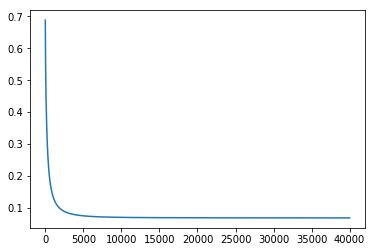

In [103]:
#for J_history in costs :
visualize_cost(costs[3])

In [104]:
pprint(coeficients)

[array([-2.26799935,  0.0992041 ,  1.05650397,  5.44707833,  5.8868473 ,
       -5.6359005 ,  2.2548923 , -3.78394826, -6.03727584,  3.30425744,
        3.20755539, -1.39838838, -0.08227454, -0.19168908, -2.5643104 ]),
 array([-3.6008707 ,  0.52086248, -1.53524942,  1.08702249, -3.95523762,
       -1.0612541 ,  2.29110342,  0.21486748,  4.09650304, -3.55194895,
       -4.16178004, -0.84902982,  0.14478133, -1.2653804 ,  4.23126941]),
 array([-3.4982832 , -0.3027943 , -0.05872397, -3.5238589 , -3.59539725,
        3.60056079, -6.22275092, -1.92559896, -3.02418201,  0.69593325,
        1.90624177,  2.5864709 , -0.39734004, -3.07443707, -2.50380591]),
 array([-2.50639018, -0.19583837,  0.86200821, -3.19342232,  2.60047424,
        3.19458757,  1.84019135,  4.57164359,  4.32685853,  0.17382821,
       -0.0527677 , -0.27677494,  0.2625099 ,  4.73208425,  0.39829606])]


In [105]:
coeficients = np.array(coeficients)
print(coeficients.shape)

(4, 15)


### One vs all Predict

In [106]:
probability = sigmoid(np.dot(X, coeficients[0]))
pprint(probability.shape)
pprint(probability[0:30])
pprint(set(probability))

(1600,)
array([1.51932975e-02, 8.11857042e-03, 7.85555555e-03, 1.63381853e-02,
       4.49039608e-04, 1.72995996e-03, 7.61864052e-03, 8.90496922e-01,
       3.60996793e-03, 9.96458469e-01, 9.53972538e-01, 9.58872194e-01,
       9.72275860e-01, 1.63080555e-03, 1.04847526e-02, 8.66701575e-04,
       4.44931182e-03, 5.63648241e-03, 3.56947281e-02, 9.91780206e-01,
       1.46035919e-02, 4.31079336e-02, 8.23434845e-03, 9.64207334e-01,
       3.90070723e-03, 9.74611338e-01, 3.50688280e-03, 9.41452096e-01,
       1.85542638e-03, 9.96229601e-01])
{4.966709225277822e-05,
 8.91608445889377e-05,
 0.00013531564442081773,
 0.00013725812770648676,
 0.00014259965881931974,
 0.00015326382700958316,
 0.0001892133004193005,
 0.00019044027459587447,
 0.00020636811165646732,
 0.0002348339983146534,
 0.00025476977462845726,
 0.00028703725907266477,
 0.0002948202008754348,
 0.0002972495578248858,
 0.0002976344971186332,
 0.000298952894886837,
 0.0003025490755742012,
 0.000311405840531337,
 0.000322183047391

 0.9857831798793795,
 0.9858094907994748,
 0.9858711483808857,
 0.9860022471059289,
 0.9860290713327708,
 0.986101742159267,
 0.986169572015253,
 0.9863075799961765,
 0.9863078807676345,
 0.9864452293170852,
 0.9864532607046254,
 0.986906249592299,
 0.9869134882911668,
 0.9870188149586198,
 0.9870503883004546,
 0.9873714322327244,
 0.9873729795205122,
 0.987505074543386,
 0.9875759425133552,
 0.9878290250014412,
 0.9878668081217752,
 0.987962863698939,
 0.9879942631491504,
 0.9880558450555178,
 0.9880791470838642,
 0.9880830741361325,
 0.9881001570197915,
 0.9881379377679189,
 0.9881841265241329,
 0.9882390703365813,
 0.9883054093699254,
 0.9885118060696989,
 0.9885231088255942,
 0.9885444600247371,
 0.9885933579236105,
 0.9886496219545712,
 0.9887128172219598,
 0.9888109791625793,
 0.9888710702631153,
 0.9888747873031605,
 0.9888900028756695,
 0.9889788007299108,
 0.9890064360883776,
 0.9890607409123117,
 0.9890779874088458,
 0.989195319382269,
 0.9892070808273584,
 0.9892113108489431

In [111]:
#classProbabilities = sigmoid(X * classifiers.T)
classProbabilities = []
for i in range(0,4):
    probability = sigmoid(np.dot(X, coeficients[i]))
    print(probability.shape)
    print(probability[0:30])
    classProbabilities.append(probability)


(1600,)
[1.51932975e-02 8.11857042e-03 7.85555555e-03 1.63381853e-02
 4.49039608e-04 1.72995996e-03 7.61864052e-03 8.90496922e-01
 3.60996793e-03 9.96458469e-01 9.53972538e-01 9.58872194e-01
 9.72275860e-01 1.63080555e-03 1.04847526e-02 8.66701575e-04
 4.44931182e-03 5.63648241e-03 3.56947281e-02 9.91780206e-01
 1.46035919e-02 4.31079336e-02 8.23434845e-03 9.64207334e-01
 3.90070723e-03 9.74611338e-01 3.50688280e-03 9.41452096e-01
 1.85542638e-03 9.96229601e-01]
(1600,)
[0.00289516 0.00124968 0.00403775 0.99384054 0.97770347 0.00229665
 0.99705475 0.02403674 0.99688579 0.00340889 0.0341274  0.00495279
 0.03918473 0.00132311 0.01473612 0.00862966 0.97080992 0.99366316
 0.00604894 0.00623088 0.99192617 0.93712334 0.00518514 0.06532269
 0.00379854 0.00567241 0.00213088 0.06848041 0.96047275 0.00131628]
(1600,)
[1.22427598e-02 9.95764601e-01 2.47390827e-03 1.24475070e-03
 2.00953739e-02 9.94976125e-01 1.27548718e-03 5.56972616e-03
 4.76804826e-04 3.38231034e-03 1.40697344e-03 1.32001657e-0

In [112]:
classProbabilities = np.array(classProbabilities)
classProbabilities.shape
print(classProbabilities[1].shape)

(1600,)


In [113]:
Classifiers = []
for i in range (0,4):
    classifier = [1 if a > 0.5 else 0 for a in classProbabilities[i]]
    pprint(set(classifier))
    pprint(sum(classifier))
    Classifiers.append(classifier)

Classifiers = np.array(Classifiers)

{0, 1}
536
{0, 1}
322
{0, 1}
296
{0, 1}
446


In [71]:
def find_max_index (liste):
    maximum = liste[0]
    index = 0
    for i in range (0, len(liste)) :
        if liste[i] > maximum :
            maximum = liste[i]
            index = i
    return i
    

In [82]:
predictions = []
for i in range (0, 1600) :
    probab = [classProbabilities[0][i], classProbabilities[1][i], classProbabilities[2][i], classProbabilities[3][i]]
    pprint(l)
    #print(find_max_index (probab))
    predictions.append(find_max_index (probab.copy()))

[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863

 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863

 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863

[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863

 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863

In [84]:
predictions = np.array(predictions)
predictions.shape

(1600,)

In [85]:
predictions[0:200]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])